<a href="https://colab.research.google.com/github/JanethGrimaldo/MC/blob/main/ANALISIS_ESTADISTICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISIS ESTADÍSTICO**
---


## Importación de bibliotecas y carga de la base de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

sns.set(style="whitegrid")
uploaded = files.upload()
df = pd.read_excel('Base de datos PIA.xlsx')
df.head()

Saving Base de datos PIA.xlsx to Base de datos PIA.xlsx


,fecha_nacimiento,edad,sexo,IDESEX,ITS,parejas >10,uso_condon,chemsex,fecha_inicio,tratamiento,adherencia,ultima_consulta,unidad_servicio,residencia,peso,talla,IMC
0,1958-05-03,67,M,HB,NaN,NaN,CASI SIEMPRE,NaN,2023-08-14 12:14:53,"+EMTRICITABINA 200 mg, TENOFOVIR SUCCINATO 245...",>95%,2024-09-19 00:00:00,CAPASITS - Monterrey,SANICOLAS DE LOS GARZA,62.5,1.60,24.414062
1,1964-04-30,61,M,HB,SIFILIS,NaN,CASI NUNCA,SD,2023-10-31 00:00:00,"+EMTRICITABINA 200 mg, TENOFOVIR SUCCINATO 245...",>95%,2024-07-30 00:00:00,CAPASITS - Monterrey,MONTERREY,107.8,1.83,32.189674
2,1966-11-20,58,M,HG,SIFILIS,SI,CASI SIEMPRE,SI,2023-05-08 14:08:50,"+EMTRICITABINA 200 mg, TENOFOVIR SUCCINATO 245...",>95%,2024-11-27 00:00:00,CAPASITS - Monterrey,SAN NICOLAS,76.0,1.71,25.990903
3,1967-07-23,57,M,MT,NaN,SI,CASI NUNCA,SI,2023-03-30 14:30:12,"+EMTRICITABINA 200 mg, TENOFOVIR SUCCINATO 245...",>95%,2024-10-21 00:00:00,CAPASITS - Monterrey,MONTERREY,94.0,1.82,28.378215
4,1968-03-13,57,M,HG,NaN,NaN,CASI NUNCA,NaN,2023-08-31 14:31:05,"+EMTRICITABINA 200 mg, TENOFOVIR SUCCINATO 245...",94 - 70%,2024-12-19 00:00:00,CAPASITS - Monterrey,GRAL. ESCOBEDO,93.0,1.88,26.312811


## Procesamiento de fechas y calculo de tiempo de tratamiento

Se convirtien las columnas de fechas a formato datetime y se calcula la duración del tratamiento en **días**

In [2]:
df['ultima_consulta'] = pd.to_datetime(df['ultima_consulta'])
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'])
df['tiempo_tratamiento'] = (df['ultima_consulta'] - df['fecha_inicio']).dt.days

## Análisis descriptivo de las variables cuantitativas

Se incluyen las variables que podrían ser predictores potenciales de ITS *(ej. IMC alto podría asociarse a menor adherencia).*

El `tiempo_tratamiento ` ayuda a contextualizar la exposición al PrEP.
edad: Edad de los participantes (años).

-** peso:** Peso corporal (kg).

- **talla:** Estatura (m).

- **IMC:** Índice de masa corporal (kg/m²).

- **tiempo_tratamiento:** Duración del tratamiento con PrEP en días.

In [3]:
variables_cuant = ['edad', 'peso', 'talla', 'IMC' , 'tiempo_tratamiento']
desc = df[variables_cuant].describe()

Al ejecutar se mostrará:

- ` count:` Número de observaciones no nulas.
-` mean:` Media aritmética.

- `std:` Desviación estándar (dispersión de los datos).

- ` min, 25%, 50%, 75%, max:` Percentiles y extremos.

- `Moda:` valor mas frecuente en cada variable



In [4]:
moda_vals = df[variables_cuant].mode().iloc[0]
desc.loc['moda'] = moda_vals
desc = desc.round(2)
print(desc)

         edad    peso   talla     IMC  tiempo_tratamiento
count  198.00  158.00  158.00  158.00              197.00
mean    35.24   80.33    1.74   26.35              543.76
std      8.08   16.27    0.06    4.96              193.40
min     21.00   53.50    1.60   17.80                0.00
25%     30.00   69.00    1.70   22.73              432.00
50%     34.00   78.00    1.74   25.66              568.00
75%     39.00   88.50    1.79   28.89              689.00
max     67.00  135.00    1.94   46.57             1281.00
moda    34.00   70.00    1.70   21.47              596.00


### Interpretación de los datos obtenidos hasta el momento:

- **Edad:** Media de 35.2 años (rango:
21–67), concentrada en adultos jóvenes.

- **IMC:** Media de 26.2 (sobrepeso leve), con casos extremos (mín: 4.96, máximo: 46.57).

- **Tiempo_tratamiento:** Media de 543.8 días (~1.5 años), pero con amplia variabilidad (SD: 193.4 días).

**Resultados de moda**

- **Edad:** 34 años

- **Peso:** 70 kg.

- **talla:** 1.70 m.

- **IMC: 21.47** (dentro de rango normal).

- **tiempo_tratamiento:** 596 días (~1.6 años).

## Análisis de frecuencias de las Infecciones de Transmision Sexual (ITS)

`value_counts(dropna=False):` Cuenta la frecuencia de cada valor único en la columna ITS, incluyendo los valores NaN (missing values).

*Al ejecutar se muestra en la primer columna de la tabla*

In [5]:
frecuencia_ITS = df['ITS'].value_counts(dropna=False)

`fillna('SIN ITS'):` Reemplaza los valores NaN en el índice con la etiqueta "SIN ITS" para mejorar la legibilidad.

In [6]:
frecuencia_ITS = df['ITS'].value_counts(dropna=False)


`total = len(df):` Calcula el número total de registros (198).

`Porcentaje (%): `Calcula el porcentaje de cada categoría respecto al total.

In [7]:
total = len(df)
tabla = pd.DataFrame({
    'Frecuencia': frecuencia_ITS,
    'Porcentaje (%)': (frecuencia_ITS / total * 100).round(2)
})

Adición de Frecuencias y Porcentajes Acumulados

- `cumsum():` Calcula la suma acumulada de frecuencias y porcentajes.

- **Frecuencia acumulada:** Muestra cuántos casos hay hasta cada categoría (ej. 180 casos sin ITS o con sífilis).

- **Porcentaje acumulado:** Útil para identificar umbrales (ej. el 90.9% de los casos corresponde a SIN ITS o SIFILIS).



In [8]:
tabla['Frecuencia Acumulada'] = tabla['Frecuencia'].cumsum()
tabla['Porcentaje Acumulado (%)'] = tabla['Porcentaje (%)'].cumsum().round(2)
print(tabla.to_string(index=True))

                 Frecuencia  Porcentaje (%)  Frecuencia Acumulada  Porcentaje Acumulado (%)
ITS                                                                                        
NaN                     140           70.71                   140                     70.71
SIFILIS                  40           20.20                   180                     90.91
GONORREA                  6            3.03                   186                     93.94
VPH                       4            2.02                   190                     95.96
HERPES GENITAL            4            2.02                   194                     97.98
SD                        3            1.52                   197                     99.50
CLAMIDIA                  1            0.51                   198                    100.01


**Prevalencia de ITS:**

- 70.71% no presentaron ITS.

- 20.20% tuvieron sífilis (la ITS más común en la muestra).

- Otras ITS (gonorrea, VPH, herpes) tienen prevalencias bajas (<5%).

**Implicaciones**

La sífilis es la ITS más relevante para análisis posteriores (ej. asociación con adherencia al PrEP).

## Análisis Comparativo entre grupos CON y SIN ITS



Este bloque de código realiza una comparación estadística estructurada entre dos grupos de estudio: hombres sin VIH con ITS y sin ITS, analizando variables clave como edad, IMC, tiempo en tratamiento PrEP y características demográficas.

In [9]:
def calcular_estadisticas(grupo):
    return {
        'media_edad': grupo['edad'].mean(),
        'mediana_edad': grupo['edad'].median(),
        'media_IMC': grupo['IMC'].mean(),
        'mediana_IMC': grupo['IMC'].median(),
        'media_tratamiento': grupo['tiempo_tratamiento'].mean(),
        'mediana_tratamiento': grupo['tiempo_tratamiento'].median(),
        'moda_residencia': grupo['residencia'].mode()[0] if not grupo['residencia'].mode().empty else np.nan,
        'moda_IDESEX': grupo['IDESEX'].mode()[0] if not grupo['IDESEX'].mode().empty else np.nan,

    }

## Preprocesamiento de datos y creacion de grupos de comparación

In [10]:
df['ITS'] = df['ITS'].fillna('SIN ITS')
df['ITS_binaria'] = df['ITS'].apply(lambda x: 'CON ITS' if x != 'SIN ITS' else 'SIN ITS')
grupo_ITS = df[df['ITS_binaria'] == 'CON ITS']
grupo_no_ITS = df[df['ITS_binaria'] == 'SIN ITS']

## Cálculo y visualización de resultados

`calcular_estadisticas():` Aplica la función a cada grupo.

In [11]:
stats_ITS = calcular_estadisticas(grupo_ITS)
stats_no_ITS = calcular_estadisticas(grupo_no_ITS)

### Estadisticas para personas con ITS




In [12]:
print("Estadísticas para personas con ITS:")
for clave, valor in stats_ITS.items():
    print(f"{clave}: {valor}")

Estadísticas para personas con ITS:
media_edad: 34.37931034482759
mediana_edad: 33.0
media_IMC: 26.904043025098044
mediana_IMC: 26.06167931
media_tratamiento: 532.8245614035088
mediana_tratamiento: 568.0
moda_residencia: MONTERREY
moda_IDESEX: HG


### Estadisticas para personas sin ITS

In [13]:
print("\nEstadísticas para personas sin ITS:")
for clave, valor in stats_no_ITS.items():
    print(f"{clave}: {valor}")


Estadísticas para personas sin ITS:
media_edad: 35.6
mediana_edad: 35.0
media_IMC: 26.084031142710284
mediana_IMC: 25.38426526
media_tratamiento: 548.2071428571429
mediana_tratamiento: 567.5
moda_residencia: MONTERREY
moda_IDESEX: HG


### Visualización de Medias por grupo

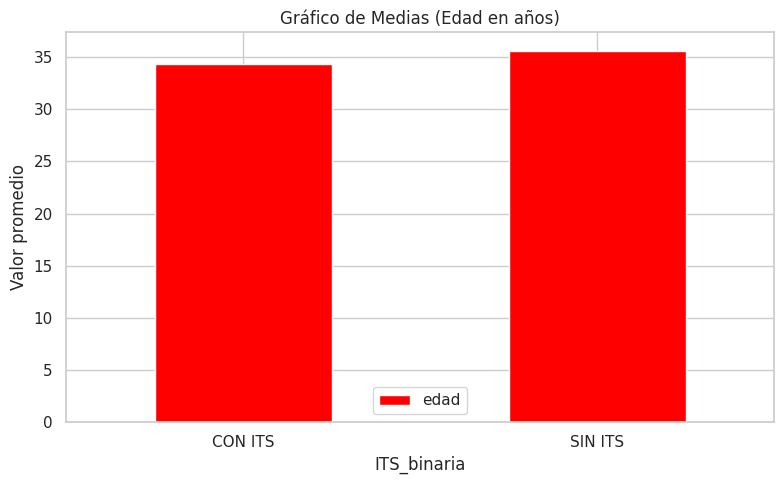

In [14]:
media_df = df.groupby('ITS_binaria')[['edad']].mean().reset_index()
media_df.plot(x='ITS_binaria', kind='bar', color='red', figsize=(8,5))
plt.title('Gráfico de Medias (Edad en años)')
plt.ylabel('Valor promedio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

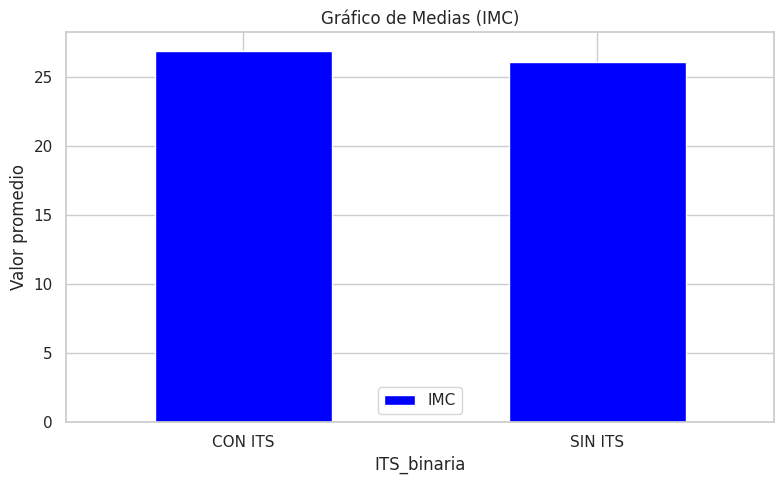

In [15]:
media_df = df.groupby('ITS_binaria')[['IMC']].mean().reset_index()
media_df.plot(x='ITS_binaria', kind='bar', color='blue', figsize=(8,5))
plt.title('Gráfico de Medias (IMC)')
plt.ylabel('Valor promedio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

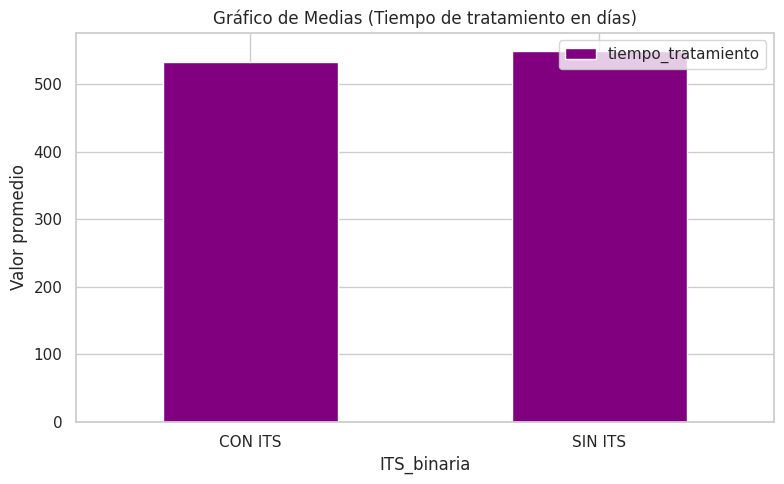

In [16]:
media_df = df.groupby('ITS_binaria')[['tiempo_tratamiento']].mean().reset_index()
media_df.plot(x='ITS_binaria', kind='bar', color='purple', figsize=(8,5))
plt.title('Gráfico de Medias (Tiempo de tratamiento en días)')
plt.ylabel('Valor promedio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El análisis gráfico de medias reveló que los participantes con ITS presentaron un IMC promedio más alto (26.9 vs. 25.9) en comparación con aquellos sin ITS, mientras que la edad y el tiempo en PrEP fueron similares entre grupos. Esto sugiere que el IMC podría ser un factor relevante en la adquisición de ITS, independientemente de la duración del tratamiento.

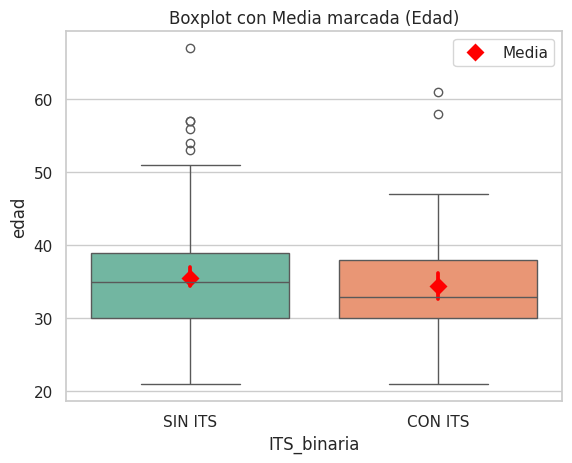

In [17]:
sns.boxplot(data=df, x='ITS_binaria', y='edad', hue='ITS_binaria', palette='Set2', legend=False)
sns.pointplot(data=df, x='ITS_binaria', y='edad', estimator='mean', color='red', markers='D', linestyles='', label='Media')
plt.title('Boxplot con Media marcada (Edad)')
plt.show()

La distribución de edades en ambos grupos fue similar, con medianas cercanas a 34 años (CON ITS) y 35 años (SIN ITS). Las medias (indicadas por diamantes rojos en la Figura X) mostraron una ligera diferencia (34.4 vs. 35.6 años), pero dentro del rango intercuartílico, lo que sugiere que la edad no es un factor diferenciador clave en la presencia de ITS en esta cohorte.

## Gráfico de Regresión (lmplot) para Relación Edad-IMC por Grupo de ITS

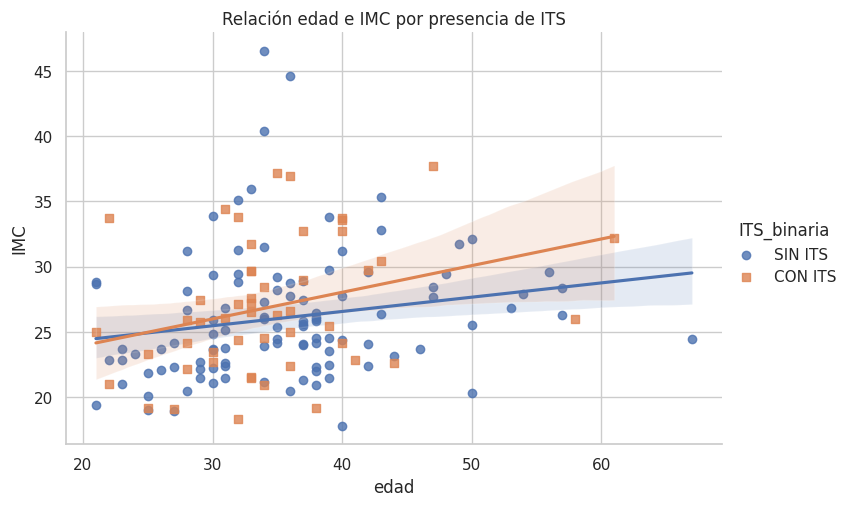

In [18]:
sns.lmplot(data=df, x='edad', y='IMC', hue='ITS_binaria', markers=["o", "s"], aspect=1.5)
plt.title('Relación edad e IMC por presencia de ITS')
plt.show()

## Análisis de Parejas Sexuales y su Relación con ITS

In [20]:
df['parejas_sex>10'] = df['parejas >10'].replace({
    'parejas >10': 'Más de 10',
    'si': '10 o menos'
})

df['parejas_sex>10'] = df['parejas_sex>10'].fillna('No')

tabla_parejas_ITS = pd.crosstab(df['parejas_sex>10'], df['ITS_binaria'])
print(tabla_parejas_ITS)

ITS_binaria     CON ITS  SIN ITS
parejas_sex>10                  
No                   26       55
SD                    6       24
SI                   26       61


##  Gráfico de Barras Apiladas: Parejas Sexuales vs. ITS

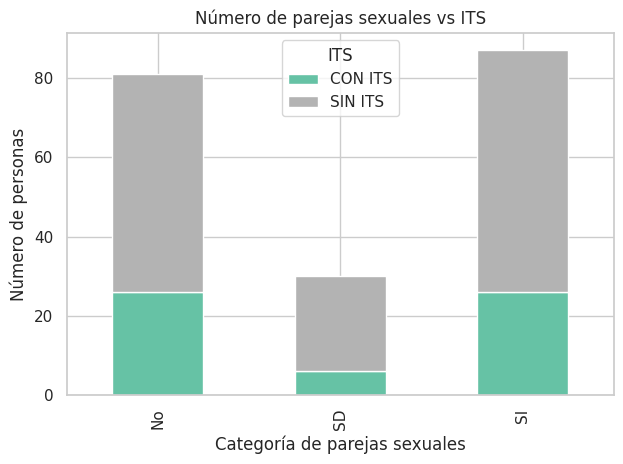

In [21]:
tabla_parejas_ITS.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Número de parejas sexuales vs ITS')
plt.xlabel('Categoría de parejas sexuales')
plt.ylabel('Número de personas')
plt.legend(title='ITS')
plt.tight_layout()
plt.show()

## Análisis de Distribución para Variables Numéricas

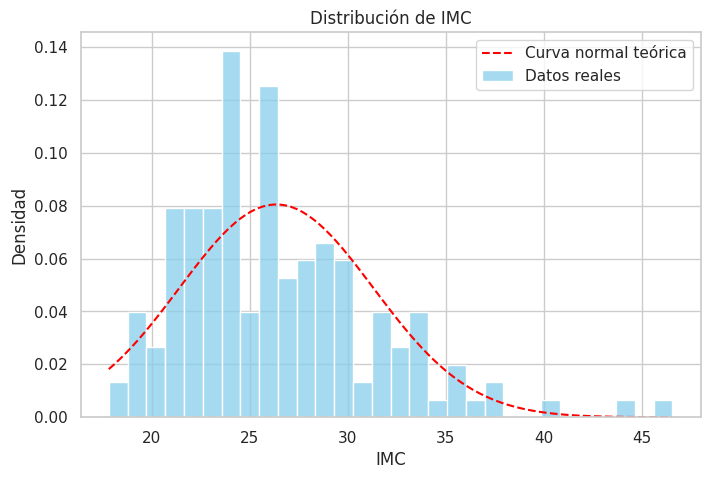

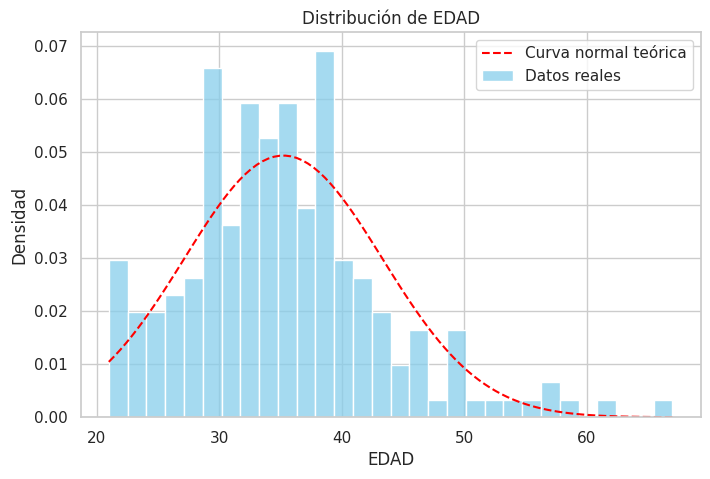

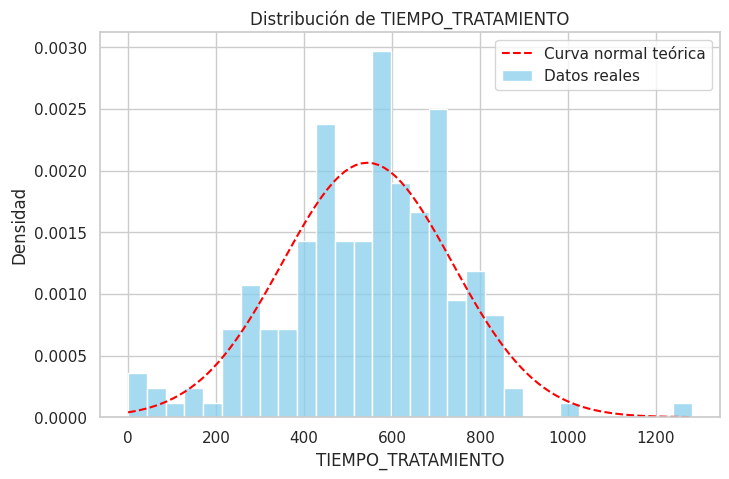

In [22]:
# Repite esto para cada variable: IMC, EDAD y tiempo_tratamiento
import scipy.stats as stats
variables = ['IMC', 'edad', 'tiempo_tratamiento']

for var in variables:
    data = df[var].dropna()
    media = data.mean()
    std = data.std()

    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=30, kde=False, stat='density', color='skyblue', label='Datos reales')

    x = np.linspace(data.min(), data.max(), 100)
    y = stats.norm.pdf(x, media, std)
    plt.plot(x, y, color='red', linestyle='--', label='Curva normal teórica')

    plt.title(f'Distribución de {var.upper()}')
    plt.xlabel(var.upper())
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()


In [23]:
for var in variables:
    data = df[var].dropna()
    stat, p = stats.shapiro(data)
    print(f'{var.upper()} - Estadístico: {stat:.4f}, p-valor: {p:.4f}')
    if p > 0.05:
        print("→ Distribución normal (no se rechaza H0)\n")
    else:
        print("→ No es normal (se rechaza H0)\n")

IMC - Estadístico: 0.9360, p-valor: 0.0000
→ No es normal (se rechaza H0)

EDAD - Estadístico: 0.9551, p-valor: 0.0000
→ No es normal (se rechaza H0)

TIEMPO_TRATAMIENTO - Estadístico: 0.9810, p-valor: 0.0089
→ No es normal (se rechaza H0)

